<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/GINN_Colab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GINN Teil 10

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

## Bezug Binary Cross Entropy zu KLD


Die Binary Cross Entropy (BCE) kann als ein Spezialfall der Kullback Leibler Divergenz (KLD) angesehen werden, wenn die tatsächlichen y Werte nur 0 und 1 annehmen können.


Zeige also, dass man für den binären Fall

$
D_{KL}(P || Q) = \sum_{y \in \mathcal{D}} P(y) \log\left(\frac{P(y)}{Q(\hat y)}\right)$


überführen kann in

$L_{BCE} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})]$







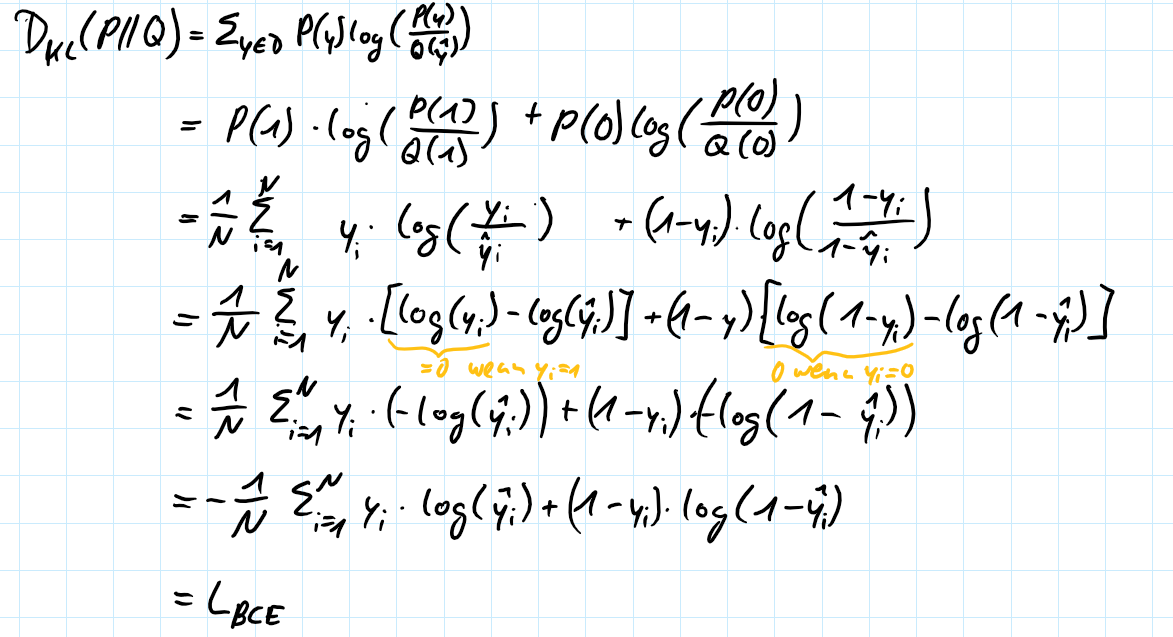

## Multiple Choice

Welche der folgenden Aussagen sind wahr?



1.   Der Wert der Kreuzentropie ist immer positiv
2.   Kreuzentropie spielt für binäre Klassifikationsprobleme eine Rolle, aber nicht bei Multi-Klassifikationsproblemen
3.  Die Kullback Leibler Divergenz ist symmetrisch
4.  Die Kullback Leibler Divergenz ist differenzierbar

1 und 4 sind wahr.

## Visuelle Interpretation der KLD

Gegeben sind zwei Normalverteilungen je mit Mittelwert und Standardabweichung. Verändern Sie diese über die gegebenen Slider. Wie interpretieren Sie das Verhalten der KLD Werte visuell (q=grün, p=rot)?

Hinweis: erhöhen Sie zunächst nur die Standardabweichung einer der beiden Verteilungen von 1 auf 2.



### Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
import math


# Funktion zur Berechnung der Kullback-Leibler-Divergenz
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Funktion zur Aktualisierung der Grafik
def update(mean1=0, std1=1, mean2=0, std2=1):
    # Wertebereich für die x-Achse
    x = np.linspace(-5, 5, 1000)

    # Wahrscheinlichkeitsdichtefunktionen (PDFs)
    p = norm.pdf(x, mean1, std1)
    q = norm.pdf(x, mean2, std2)


    # Normalisiere die gewichteten Verteilungen
    p /= np.sum(p)
    q /= np.sum(q)

    kldd = p*np.log(q/p)
    kldd /= np.sum(kldd)

    # Berechne die KLD
    kld = kl_divergence(p, q)

    # Plot
    plt.figure(figsize=(10, 5))
    #plt.plot(x, s, 'k', lw=2, label='Sigmoid function')
    plt.fill_between(x, p, color='red', alpha=0.5)#, where=(x < 0))
    plt.fill_between(x, q, color='green', alpha=0.5)#, where=(x >= 0))
    plt.fill_between(x, kldd, color='yellow', alpha=0.5)#, where=(x >= 0))

    plt.title(f'KLD = {kld:.2f}')
    plt.legend()
    plt.show()

### Visualisierung

In [ ]:


# Erstelle Slider für die Mittelwerte und Standardabweichungen
interact(update,
         mean1=FloatSlider(value=0, min=-2, max=2, step=0.1),
         std1=FloatSlider(value=1, min=0.1, max=2, step=0.1),
         mean2=FloatSlider(value=0, min=-2, max=2, step=0.1),
         std2=FloatSlider(value=1, min=0.1, max=2, step=0.1))


interactive(children=(FloatSlider(value=0.0, description='mean1', max=2.0, min=-2.0), FloatSlider(value=1.0, d…

<function __main__.update(mean1=0, std1=1, mean2=0, std2=1)>

## PyTorch KLD Implementierung


Berechnen Sie die Kullback Leibler Divergenz für die folgenden Werte. Schauen Sie sich danach die PyTorch Implementierung der KLD an. Gibt es Unterschiede zu Ihrer Implementierung? Womit sind diese zu erklären? Stellen Sie sicher, dass die berechneten Werte annähernd identisch sind.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Definition der Eingaben
logits = torch.tensor([1.0, 2.0, 3.0])
target = torch.tensor([0.1, 0.2, 0.7])


In [ ]:
# IHR CODE HIER